### КОРРЕЛЯЦИЯ и КОВАРИАЦИЯ

In [ ]:
# ковариация - если она близка к 0 , то зависимости нет. 
# ей неудобно пользоваться, так как есть дисперсия
# на практике применяется редко

In [2]:
import numpy as np

In [3]:
from scipy import stats

In [8]:
mtx = np.concatenate((
    stats.norm(0, 1).rvs(size=10).reshape(1 ,-1),
    stats.norm(0, 1).rvs(size=10).reshape(1 ,-1)
))

print(mtx)
print("=======")
print(np.cov(mtx))

[[-0.02860904  0.41226048  0.9138126  -2.26920596 -0.1592845  -0.36567261
  -0.50215768 -0.71806236  2.0496192   0.82038775]
 [ 0.17942385 -0.05932231  1.18313078 -0.74913175  0.16791659  1.89692265
   0.19506431 -1.00261216  0.24537626  0.5058688 ]]
[[1.32818017 0.39242179]
 [0.39242179 0.70287817]]


In [11]:
# корреляция - если она близка к 0 , то зависимости нет. 
# Если близка к 1 или -1, то корреляция есть

# !!!!! Это работает только для Линейной зависимости.
# например, не работает для квадратичной зависимости

In [9]:
mtx = np.array([[1,2,3,4], [4,3,2,1]])
stats.pearsonr(mtx[0], mtx[1])[0]

-1.0

### Теорема Байеса

### Доверительные интервалы

In [ ]:
# это насколько точно мы оценили мат ожидание

# Распределение Стьюдента - t

In [12]:
sample_norm = stats.norm(0, 1).rvs(size = 1000000)
print(np.quantile(sample_norm, 0.025))
print(np.quantile(sample_norm, 0.975))

-1.9592016199906497
1.9615147522385727


In [13]:
stats.t.ppf((1 + 0.95) / 2, 1000000)

1.9599663568141066

In [17]:
def mean_confidence_interval(data, confidence = 0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, s = np.mean(a), np.std(a)
    h = s * stats.t.ppf((1 + confidence) / 2., n - 1) / np.sqrt(n)
    return m-h, m, m+h

In [18]:
mean_confidence_interval(sample_norm)


(-0.0013057151742761198, 0.0006541807869834669, 0.002614076748243054)

### Проверка гипотез - A/B тестирование

In [ ]:
# H0 - это что-то не отличимое от чего-то 0 , 0,12 - статистическая погрешность
значимо меньше или значимо больше

# !!!! для выборок делать выборку максимум 5000
# !!!! альфа = 0.001

In [19]:
import pandas as pd

In [20]:
df = pd.read_csv('telecom_churn.csv')

In [21]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


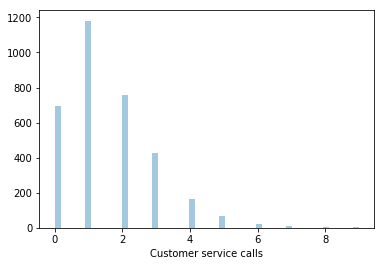

In [22]:
sns.distplot(df['Customer service calls'], kde=False)

In [23]:
service_calls = np.array(df['Customer service calls'])

In [25]:
service_calls_means = []
for i in range(1000):
    service_callls_subset = np.random.choice(service_calls, size=100)
    service_calls_means.append(np.mean(service_callls_subset))


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


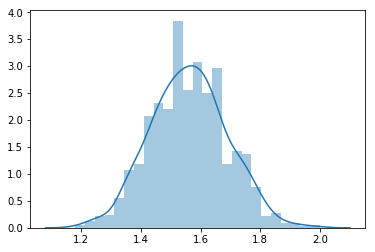

In [26]:
sns.distplot(service_calls_means)

In [27]:
stats.ttest_1samp(service_calls_means, 0)

Ttest_1sampResult(statistic=384.7628983504021, pvalue=0.0)

In [ ]:
pvalue=0.0 - 